<a href="https://colab.research.google.com/github/ElianaMontoya21/sales-predictions/blob/main/Predicciones_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
filename = '/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/Proyecto/sales_predictions.csv'
df = pd.read_csv(filename)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1) ¿Cuántas filas y columnas?**

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**2.¿Cuáles son los tipos de datos en cada variable?**

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.**

In [5]:
df.duplicated().sum()

0

**4) Identifiquen los valores faltantes**

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).**

In [7]:
# para los dtos faltantes de la columna  Item_Weight  le voy a calcular la media, ya que es una buena opción debido a que son datos flotantes
media_Item_Weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(media_Item_Weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# para la columna Outlet_Size, son muchos datos faltantes y no veo un patron, entonces le voya agregaruna categoria de 'missing' para notener que borrar esas filas y que se pierdan datos
df['Outlet_Size'].fillna('Missing', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Histograma para ver las distribuciones de diversas características en el conjunto de datos.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [10]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


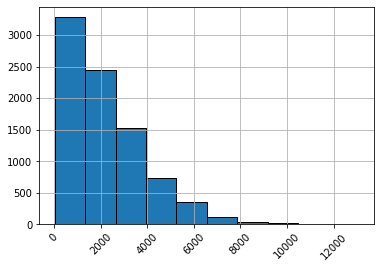

In [11]:

sales_filter = df.loc[:, 'Item_Outlet_Sales'] <= 90000
df.loc[sales_filter, 'Item_Outlet_Sales'].hist(bins = 10,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

Segun el grafico de arriba. lo datos historicos de ventas en los supermercados muestra que mas de 3000 reportes de ventas tiene un aproximado cercano a los 2000 articulos vendidos, por tienda. el otros 2500 reportes tienen un aproximado de ventas entre un poco menos de 2000 y un poco más de 2000. el los siguientes tiene menos rportes de ventas con más cantidades vendidas.

**Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


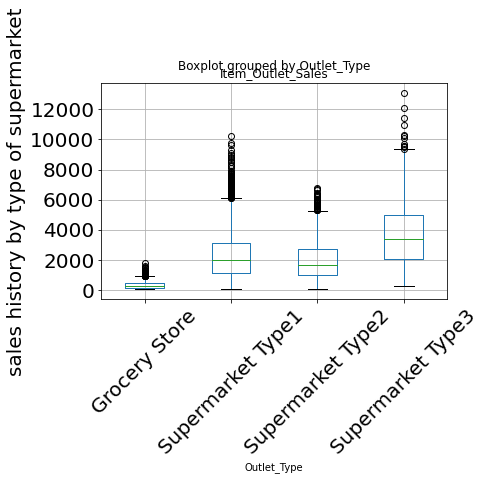

In [16]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Type');
plt.xticks(rotation = 45)

plt.ylabel('sales history by type of supermarket', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
           
           

de acuerdo con la grrafica anterior hay muchos datos a tipicos en todos los supermercados. en las Gocery Store elhistorico de ventas de mens de 1000 articulos, los super market Type 1 y 2 son un poco parecidos los datos aunque el Type 1 tiene más datos atipicos, la mayoriadelacantidad de articulos vendidos estan entre unos 1000 y 3000 con unos datos atipicosque van hasta casi los 10000 en supermatket  Type1 y hasta unos 7000 en el supermarquet Type 2, en el supermarket Type 3 losvalores estan un poco sesgados a la derecha, la mayoria de articulosvendidosvan entre 2000 y 5000 con unos valosres atipicosque van más de los 12000. esto puede ser por causa de algunas temporadas del año que se vende más en todas las tiendas.

**Mapa de calor de la correlación entre las características.**

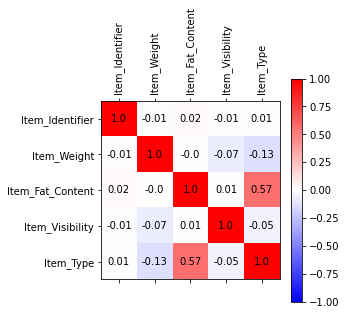

In [35]:
#Matriz de Correlación
matriz= df.corr()
plt.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)
plt.xticks(range(5),df.columns, rotation=90)
plt.yticks(range(5),df.columns)

for i in range(len(matriz.columns)):
  for j in range(len(matriz.columns)):
      plt.text(i, j, round(matriz.iloc[i, j], 2), ha="center", va="center")

plt.colorbar()
plt.show()

Según el mapa de calor hay una correlación un pocofuerte y positiva entre item_Type e Item_fat_content y unaleve relacion negativa entre Item_Type e Item_Weight
